<a href="https://colab.research.google.com/github/aniketAnvekar/Fake-News-Detection/blob/main/Fake_News_Detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

In [ ]:
#Fake News
fake_news = pd.read_csv("/content/drive/MyDrive/Fake news Dataset/Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#True data
true_news = pd.read_csv("/content/drive/MyDrive/Fake news Dataset/True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news['fake']=1
fake_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
true_news['fake'] = 0
true_news.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
news = pd.concat([fake_news, true_news])
news.sample(5)

,title,text,subject,date,fake
12712,Factbox: What's in the Brexit divorce deal?,BRUSSELS (Reuters) - The European Commission s...,worldnews,"December 8, 2017",0
11652,WOW! WHY TRUMP’S PICK FOR LABOR SECRETARY With...,President Donald Trump s pick for secretary of...,politics,"Feb 15, 2017",1
6507,Senator McCain says Russia hacking probe not i...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"January 5, 2017",0
12009,TRUMP TWEET STORM On Obamacare Sets Up Battle ...,Remember when Pelosi said it s AFFORDABLE :,politics,"Jan 3, 2017",1
3318,Court Just Gave Cops Permission To Murder Dogs,The 6th District Court in Ohio ruled on Monday...,News,"December 21, 2016",1


In [ ]:
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


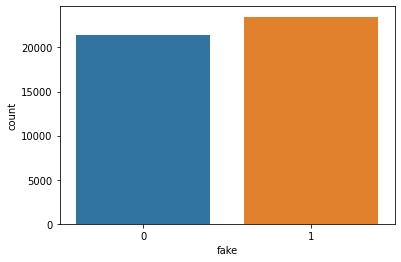

In [ ]:
sns.countplot(x='fake', data=news)

In [ ]:
news[news['fake']==1]['text'].head(2)

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
Name: text, dtype: object

In [ ]:
news[news['fake']==0]['text'].head(2)

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
Name: text, dtype: object

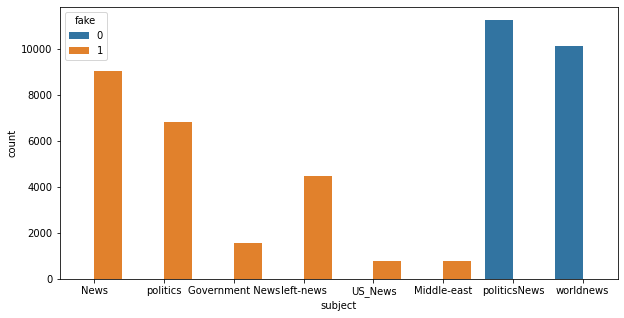

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=news, hue='fake')

In [ ]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')
news['Year'] = news['date'].dt.year
news['Month'] = news['date'].dt.month

news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


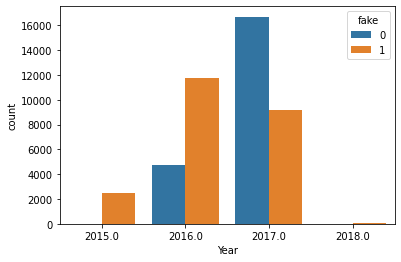

In [ ]:
# check the impact of yead on tha target
sns.countplot(x='Year', data=news, hue='fake')

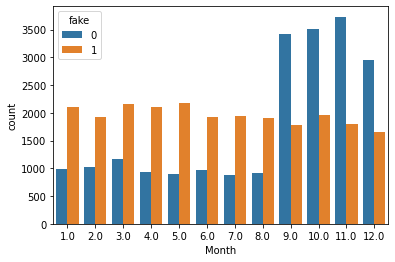

In [ ]:
sns.countplot(x='Month', data=news, hue='fake')

In [ ]:
news['text'] = news['title'] + news['text']
news.drop(labels=['title'], axis=1,inplace=True)
news.head()

,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,1,2017.0,12.0


In [ ]:
news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [ ]:
news = news.sample(frac=1)
news.head()

,text,fake
16454,WATCH HILLARY CLINTON Go Full On Socialist…You...,1
8637,You Won’t Believe What GOP Lead Poisoning Tru...,1
17399,Japan ruling bloc heads for big election win d...,0
15760,"BREAKING VIDEO: “RELAX, RELAX!” AL SHARPTON GE...",1
5958,"Mexico, U.S. agree not to talk publicly about ...",0


In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(news['text'].to_numpy(),
                                                                            news['fake'].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

In [ ]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(35918, 8980, 35918, 8980)

In [ ]:
train_sentences[:2], train_labels[:10]

(array(['REMEMBERING FDR’S Famous Pearl Harbor Speech: How “A Date That Will Live In Infamy” Almost Wasn’t [AUDIO]Did FDR actually deliver his fireside chats while sitting near a fire? Seventy-four years ago, President Franklin D. Roosevelt proclaimed December 7, 1941, as a  date which will live in infamy  after the Japanese attacked Pearl Harbor.But that most powerful line in his speech asking Congress to declare war and bring the U.S. into World War II almost wasn t. Roosevelt s original draft called it  a date which will live in world history,  rhetoric that had far less  oomph. That memorable revision along with others   a fact you can see for yourself thanks to thousands of pages of the longest-serving president s speeches made available Monday digitally for the first time.President Franklin D. Roosevelt made an important revision to his first draft of the address he would make to Congress on Dec. 8, 1941, after the Pearl Harbor attacks. FDR Presidential LibraryThe massive archive

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

417

In [ ]:
max_vocab_length = 10000
max_length = 418


from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode='int',
                                   output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "Please Do Not Forget To Upvoted"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[1774,   92,   25, 2893,    3,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [ ]:
import random
random_sentence = random.choice(train_sentences)
print(f"Original text;\n{random_sentence}\
\n\n Vectorized Version:")
text_vectorizer([random_sentence])

Original text;
BEAUTIFUL! FIRST LADY MELANIA TRUMP Hosts Military Moms: “Mother Is A Title That Changes Your Life Forever”Fist Lady Melania Trump hosted military moms at the White House on Friday. She gave a heartwarming and heartfelt speech about what it means to be a mother. She s beautiful inside and out!Notice how President Trump looks on lovingly and proudly. The First Lady speaks with empathy about how hard it must be for them to send their military son or daughter to fight for America: Thank you for all that you do, for your selflessness and for your own sacrifice on behalf of our country    First Lady Melania TrumpShe does a great job!THE DEPARTMENT OF DEFENSE: In honor of Mother s Day, President Donald J. Trump and First Lady Melania Trump welcomed active-duty troops, their spouses and mothers to the White House, today. As commander in chief of the United States, my supreme duty is to protect our citizens and that means supporting our servicemen and women,  the president said.

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[3076,  104, 1484, 1984,   15, 2706,  172,    1,    1,   12,    5,
        3496,    8,  990,  193,  494,    1, 1484, 1984,   15, 3291,  172,
           1,   27,    2,   85,   68,    9,  214,   52,  627,    5,    1,
           6,    1,  286,   38,   58,   16,  641,    3,   23,    5, 1125,
          52,   11, 3076, 1066,    6,    1,  101,   39,   15, 1317,    9,
           1,    6, 6475,    2,  104, 1484, 3065,   17,    1,   38,  101,
         558,   16,  303,   23,   10,   94,    3, 1223,   41,  172,  856,
          48, 1309,    3,  484,   10,  159, 1898,   43,   10,   56,    8,
          43,   92,   10,  193,    1,    6,   10,  193,  212, 5641,    9,
        1790,    4,   69,  114,  104, 1484, 1984,    1,  246,    5,  353,
           1,  180,    4,  355,    7, 2127,    4, 1125,   11,  200,   39,
          71,  826,   15,    6,  104, 1484, 1984,   15, 2826,    1, 1000,
          41, 9984,    6, 5040,    3,    2,   85,   68,  370,   

In [ ]:
words = text_vectorizer.get_vocabulary()
len(words)

10000

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            input_length=max_length)
embedding

In [ ]:
random_sentenc = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedd version: ")
embedding(text_vectorizer([random_sentence]))

Original text:
BEAUTIFUL! FIRST LADY MELANIA TRUMP Hosts Military Moms: “Mother Is A Title That Changes Your Life Forever”Fist Lady Melania Trump hosted military moms at the White House on Friday. She gave a heartwarming and heartfelt speech about what it means to be a mother. She s beautiful inside and out!Notice how President Trump looks on lovingly and proudly. The First Lady speaks with empathy about how hard it must be for them to send their military son or daughter to fight for America: Thank you for all that you do, for your selflessness and for your own sacrifice on behalf of our country    First Lady Melania TrumpShe does a great job!THE DEPARTMENT OF DEFENSE: In honor of Mother s Day, President Donald J. Trump and First Lady Melania Trump welcomed active-duty troops, their spouses and mothers to the White House, today. As commander in chief of the United States, my supreme duty is to protect our citizens and that means supporting our servicemen and women,  the president said.

<tf.Tensor: shape=(1, 418, 128), dtype=float32, numpy=
array([[[-0.03563859,  0.043705  ,  0.0491943 , ...,  0.02565276,
         -0.01897298, -0.02408735],
        [-0.04862798,  0.01909142, -0.02908018, ...,  0.03314653,
         -0.04259333, -0.01530283],
        [ 0.04965272, -0.04491278, -0.03573284, ...,  0.01269851,
         -0.04456055,  0.01853123],
        ...,
        [-0.03538054, -0.00987958, -0.0352563 , ...,  0.03063097,
          0.01732497, -0.02196343],
        [-0.03517004, -0.04139426,  0.0197967 , ..., -0.00675648,
         -0.02671338,  0.04818409],
        [-0.02107804, -0.03204028, -0.03803505, ..., -0.0434486 ,
         -0.00692647,  0.01013564]]], dtype=float32)>

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')

# Pass inputs to text_vectorizer(convert text into numbers)
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)


# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# Pass inputs and outputs to our model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [ ]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 418)               0         
_________________________________________________________________
embedding (Embedding)        (None, 418, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
model_history = model.fit(train_sentences,
                         train_labels,
                          epochs=5,
                         validation_data=(val_sentences, val_labels))

Epoch 1/5
1123/1123 [==============================] - 381s 337ms/step - loss: 0.6003 - accuracy: 0.6728 - val_loss: 0.3913 - val_accuracy: 0.8572
Epoch 2/5
1123/1123 [==============================] - 375s 334ms/step - loss: 0.5817 - accuracy: 0.6650 - val_loss: 0.6465 - val_accuracy: 0.6307
Epoch 3/5
1123/1123 [==============================] - 376s 335ms/step - loss: 0.1757 - accuracy: 0.9566 - val_loss: 0.0486 - val_accuracy: 0.9894
Epoch 4/5
1123/1123 [==============================] - 376s 335ms/step - loss: 0.0311 - accuracy: 0.9930 - val_loss: 0.0325 - val_accuracy: 0.9912
Epoch 5/5
1123/1123 [==============================] - 373s 332ms/step - loss: 0.0172 - accuracy: 0.9964 - val_loss: 0.0389 - val_accuracy: 0.9902


In [ ]:
model_prediction = model.predict(val_sentences)
model_prediction[:10]

array([[0.99499106],
       [0.9949908 ],
       [0.99490905],
       [0.96379733],
       [0.9980866 ],
       [0.00733805],
       [0.00242811],
       [0.01973099],
       [0.00237301],
       [0.99499017]], dtype=float32)

In [ ]:
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

print(f"Accuracy Score of LSTM model: {accuracy_score(val_labels,model_preds)}")
print(f"Recall Score of LSTM model: {recall_score(val_labels, model_preds)}")
print(f"Precsion Score of LSTM model: {precision_score(val_labels, model_preds)}")
print(f"f1 Score of LSTM model: {f1_score(val_labels, model_preds)}")

Accuracy Score of LSTM model: 0.9902004454342984
Recall Score of LSTM model: 0.9856068743286789
Precsion Score of LSTM model: 0.9954436971143416
f1 Score of LSTM model: 0.9905008635578585


[[4304   21]
 [  67 4588]]


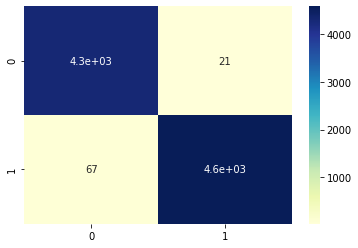

In [ ]:
from sklearn.metrics import confusion_matrix
#cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm = confusion_matrix(val_labels,model_preds)
print(cm)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")